# Hypothesis Testing and Bayes Rule

This lesson discuss a common type of hypothesis testing, a t-test, and a crucial probability concept, bayes rule.

# t-tests and p-values

A t-test indicates whether or not the difference between two groups' averages are significanlty different in their respective populations.

The value used to measure the significance is the p-value. If the p-value is < 0.05, the difference between the groups is considered to be significant.

In any dataset, we want to measure if we included any incorrect information and if we encompassed all correct information. Precision is the probability that a retrieved instance is relevant and recall is the probability that a relevant instance is retrieved. These ideas can be represented in a matrix form:


                              Predicted Positive	Predicted Negative
     True Condition Positive	| True Positive | False Negative

     True Condition Negative	| False Positive | True Negative
     

Precision and Recall can be defined as:
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)

A false positive is called a type 1 error. A false negative is called a type 2 error.

You can use an F-score to account for both precision and recall:

F-score = 2 * (precision * recall)/(precision + recall)

Which is approximately the average of the two when they are close.

So we can return to the t-test to compare the averages when the two are close.


# Bayes Rule

The definition of the rule is that posterior odds equals prior odds times Bayes factor.

Or it can be rephrased as posterior is proportional to prior times likelihood, for a given B:

P(A|B) ~ P(A)P(B|A)
                                
The rule can be derived by the fact that the probability of two events A and B happening, P(A ∩ B), is the probability
of A, P(A), times the probability of B given that A has occurred, P(B|A).

P(A ∩ B) = P(A)P(B|A)
                                
And the probability of A and B happening is also equal to the probability of B times the probability of A given B.

P(A ∩ B) = P(B)P(A|B)  
                                
Thus:

P(B)P(A|B) = P(A)P(B|A)

And solving for the probability of A given B:

P(A|B) = P(A)*(P(B|A)/P(B))
                                
And P(B) can be interpreted at integral of P(A)P(B|A)dA

In the Bayes rule, P(A) is called the prior, P(B|A) is the likelihood, and P(A|B) is the posterior.

The goal is to find the posterior.

The conjugate prior is a beta distribution and the resulting posterior is also a beta distribution.

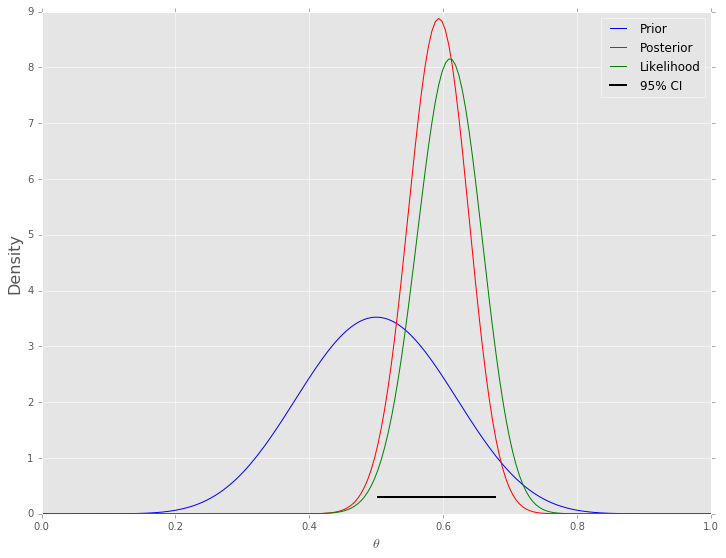

In [10]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

%matplotlib inline
%precision 4
plt.style.use('ggplot')

n = 100
h = 61
p = h/n
rv = st.binom(n, p)
mu = rv.mean()

a, b = 10, 10
prior = st.beta(a, b)
post = st.beta(h+a, n-h+b)
ci = post.interval(0.95)

thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.plot(thetas, n*st.binom(n, thetas).pmf(h), label='Likelihood', c='green')
plt.xlim([0, 1])
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

Consider a situation where we need to find P(μ,σ2|data), the posterior. Here μ is the mean and σ2 is the variance.

The cojugate prior is P(μ,σ2)=P(σ2)P(μ|σ2).

Using an example from http://engineering.richrelevance.com/bayesian-analysis-of-normal-distributions-with-python/,
we can compare the means of two difference


In [16]:
from numpy import sum, mean, size, sqrt
from scipy.stats import norm, invgamma

def draw_mus_and_sigmas(data,m0,k0,s_sq0,v0,n_samples=10000):
    N = size(data)
    the_mean = mean(data) 
    # sum of squared differences
    SSD = sum( (data - the_mean)**2 ) 

    # combining the prior with the data 
    # inv-chi-sq(v,s^2) = inv-gamma(v/2,(v*s^2)/2)
    kN = float(k0 + N)
    mN = (k0/kN)*m0 + (N/kN)*the_mean
    vN = v0 + N
    vN_times_s_sqN = v0*s_sq0 + SSD + (N*k0*(m0-the_mean)**2)/kN

    # 1) draw the variances from an inverse gamma 
    alpha = vN/2
    beta = vN_times_s_sqN/2
    # if X ~ inv-gamma(a,1) then b*X ~ inv-gamma(a,b)
    sig_sq_samples = beta*invgamma.rvs(alpha,size=n_samples)

    # 2) draw means from a normal conditioned on the drawn sigmas
    mean_norm = mN
    var_norm = sqrt(sig_sq_samples/kN)
    mu_samples = norm.rvs(mean_norm,scale=var_norm,size=n_samples)

    # 3) return the mu_samples and sig_sq_samples
    return mu_samples, sig_sq_samples

In [18]:
# step 1: define prior parameters for the normal and inverse gamma
m0 = 4. 
k0 = 1.  
s_sq0 = 1. 
v0 = 1. 

# step 2: get some random data, with slightly different statistics
A_data = normal(loc=4.1, scale=0.9, size=500)
B_data = normal(loc=4.0, scale=1.0, size=500) 

# step 3: get posterior samples
A_mus,A_sig_sqs = draw_mus_and_sigmas(A_data,m0,k0,s_sq0,v0)
B_mus,B_sig_sqs = draw_mus_and_sigmas(B_data,m0,k0,s_sq0,v0)

# step 4: perform numerical integration
# probability that mean of A is greater than mean of B:
print (mean(A_mus > B_mus))
# probability that variance of A is greater than variance of B:
print (mean(A_sig_sqs > B_sig_sqs))

0.9947
0.0283


We can also apply this to precision and recall.

Where p is precision and D is the data:

P(p|D) ~ P(D|p)P(p) and 

P(p) is the conjugate prior and P(p|D) is the posterior distribution. 

Using Bayes rule, we can also test our hypothesis through precision and find the probability of a false positive. However, in order to check for false negatives we would have to use a different test. The Bayes rule works in a situation with little to no false negatives.

Both methods are viable and it just depends on your data and which method is right for the situation.

Happy Testing!